# Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy.optimize import curve_fit
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Importation des données

In [ ]:
df = pd.read_csv('train (1).csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Exploration des données

In [ ]:
#Liste des colonnes
print('Noms de colonnes :', list(df.columns))

Noms de colonnes : ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', '

In [ ]:
#Information globales sur les differentes variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#les 5 premiéres lignes
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#les 5 derniéres lignes
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
#les types de chaque variables
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


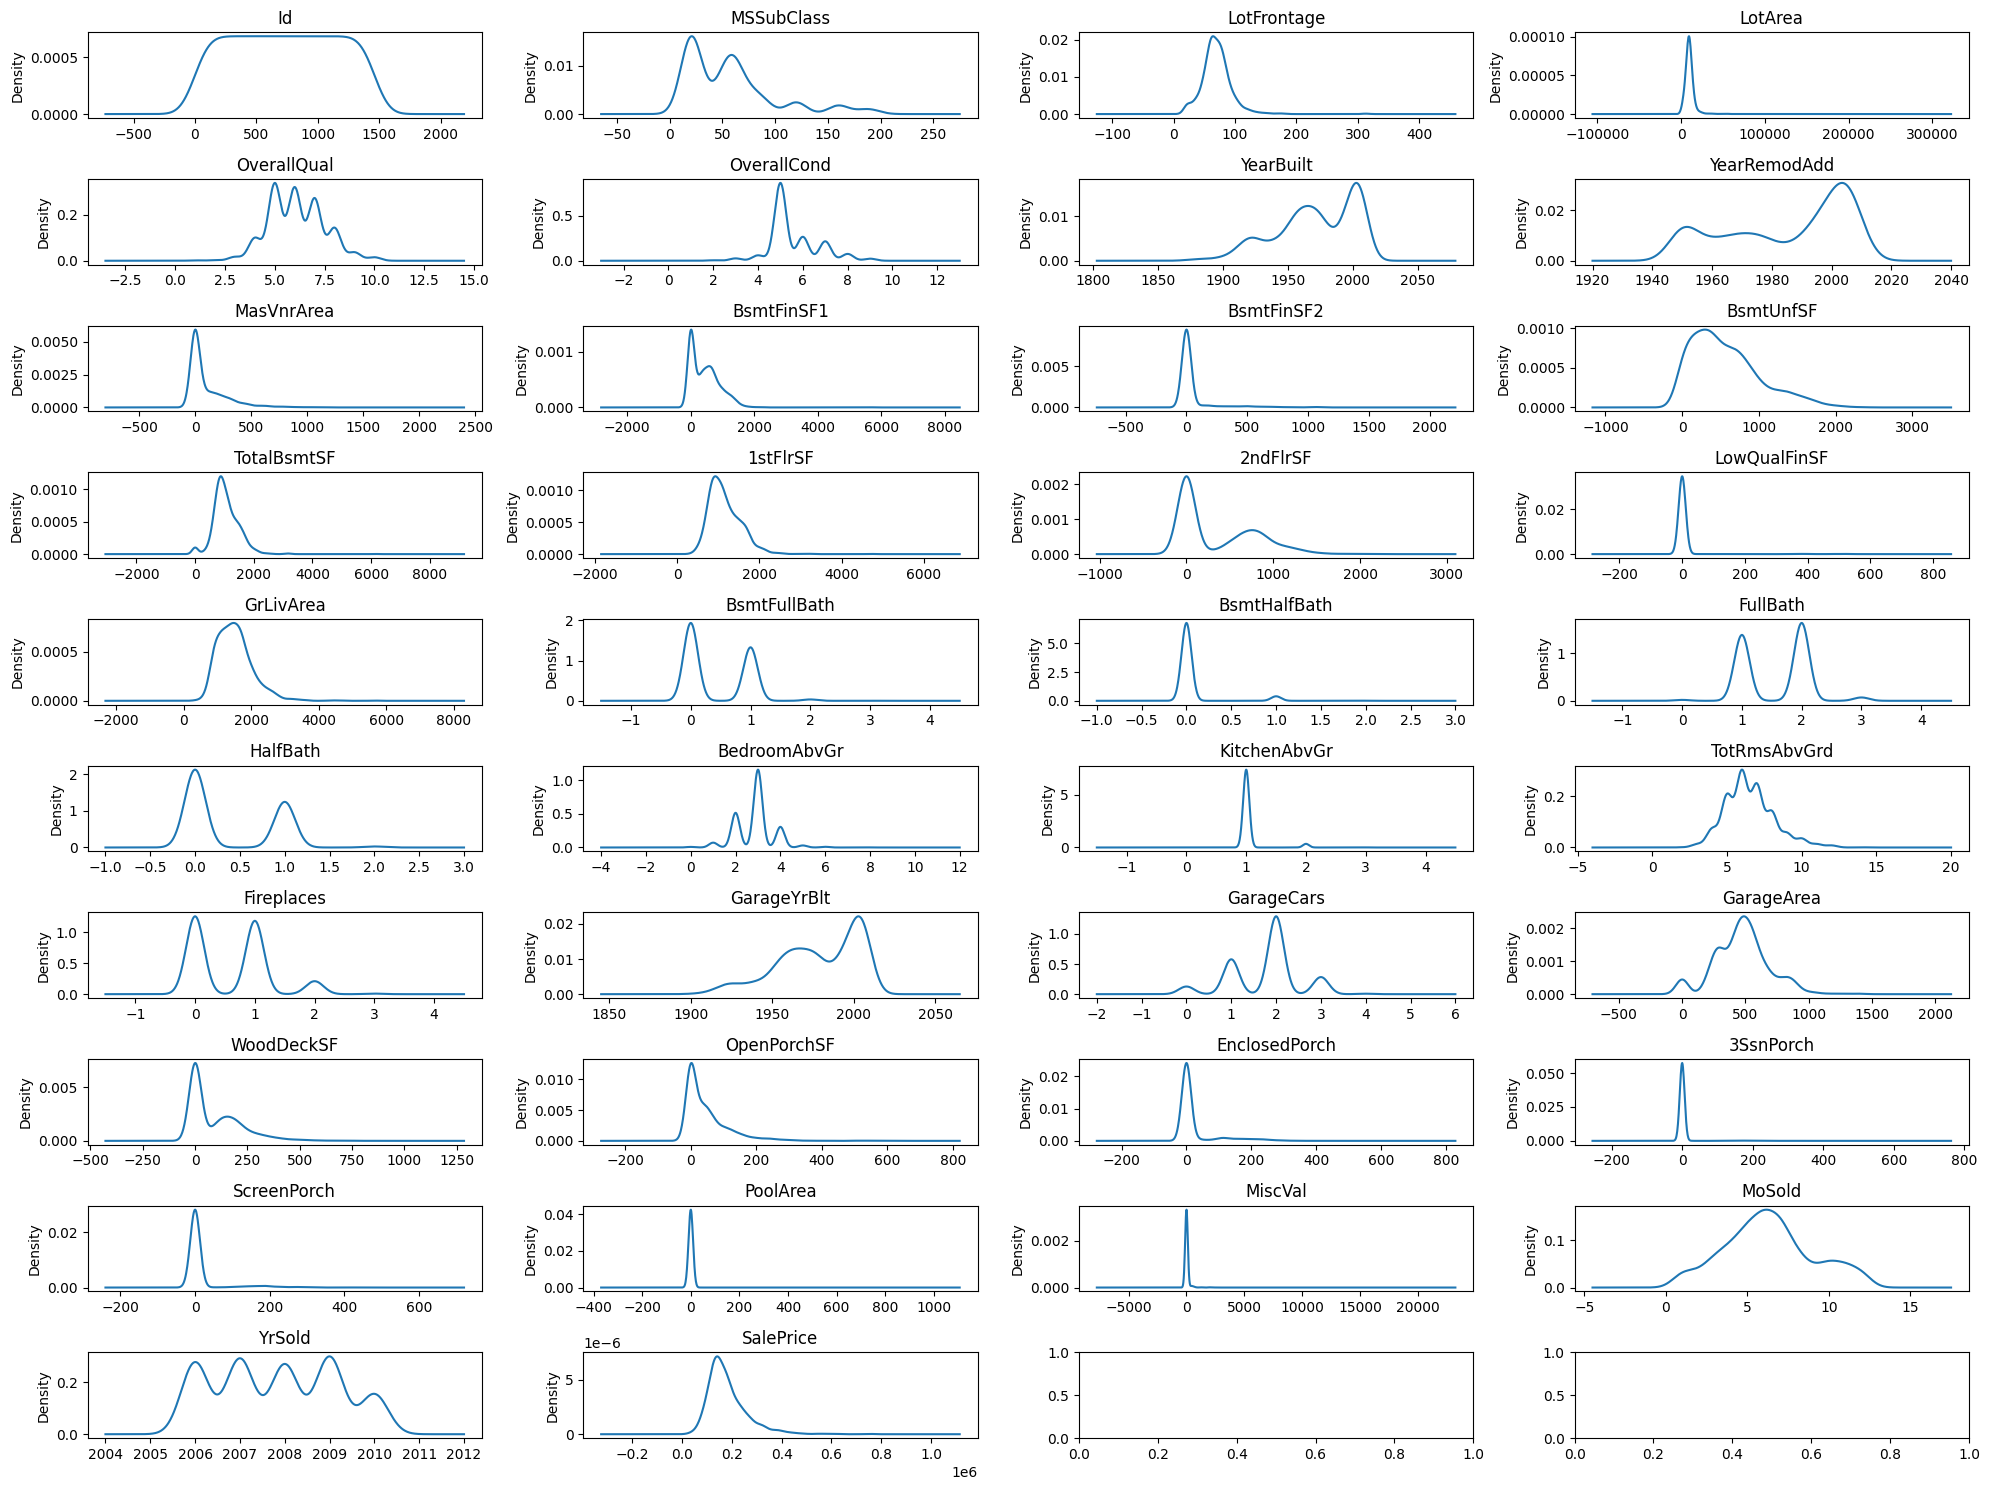

In [ ]:
#Selection des colonnes dont data est de type numerique
num_cols = df.select_dtypes(include=[np.number]).columns
#calculs de nombre de colonnes
num_cols_count = len(num_cols)
#Calculs de  nombre de lignes necessaires pour l'affichage de tout les  subplots
num_rows = int(np.ceil(num_cols_count / 4))
#calculs de nombres de colonnes necessaires pour l'affichage de tout les  subplots
num_cols_per_subplot = int(np.ceil(num_cols_count / num_rows))
#Creation d'une figure avec des subplots
fig, axes = plt.subplots(num_rows, num_cols_per_subplot, figsize=(20, 15))
#boocler sur chaque colonne avec numerical data et  creation du density plot
for i, col in enumerate(num_cols):
  #Sélection du subplot appropriée pour la colonne actuelle
    ax = axes[i // num_cols_per_subplot, i % num_cols_per_subplot]
    #Creation du  density plot
    df[col].plot(kind='density', ax=ax)
    # Définir le titre du subplot comme étant le nom de la colonne actuelle
    ax.set_title(col)
#Ajustement de la disposition des subplot pour les adapter toutes à la figure et affichage de la figure
plt.tight_layout()
plt.show()

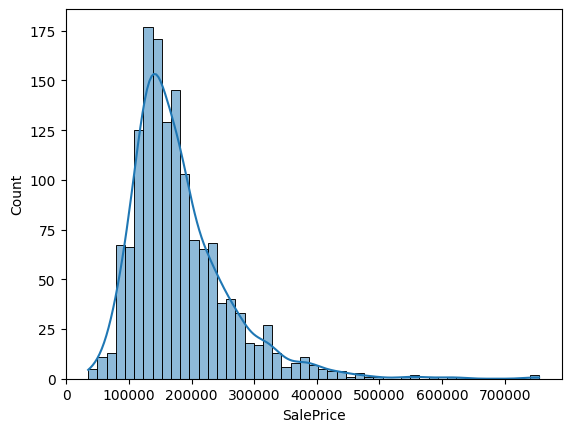

In [ ]:
#un histogramme des valeurs de la colonne "SalePrice"
#traçage d'une estimation de la densité de probabilité des données à l'aide d'une courbe de densité de noyau (KDE).
sns.histplot(df['SalePrice'], kde=True)
plt.show()

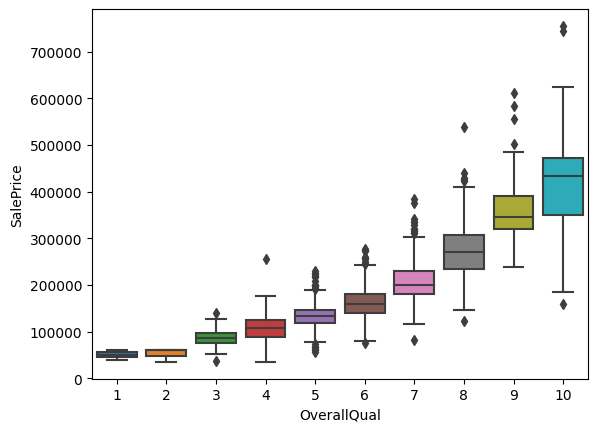

In [ ]:
#un diagramme en boîte des valeurs de la colonne "SalePrice" en fonction des différentes catégories de la colonne "OverallQual"
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()


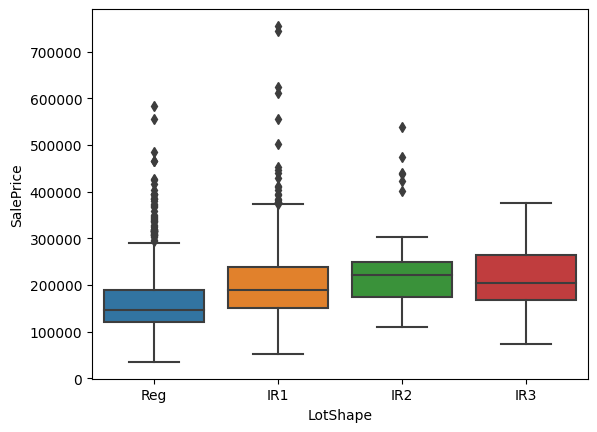

In [ ]:
#un diagramme en boîte des valeurs de la colonne "SalePrice" en fonction des différentes catégories de la colonne 'LotShape'
sns.boxplot(x='LotShape', y='SalePrice', data=df)
plt.show()


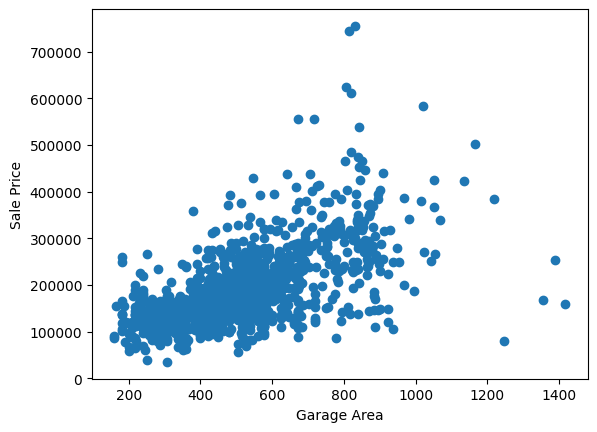

In [ ]:
#Selection des  lignes où la valeur de la colonne GarageArea est supérieure à 100
ml_data = df[df.GarageArea > 100]
plt.scatter(ml_data.GarageArea,ml_data.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.show()

In [ ]:
#Statistques descriptives
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

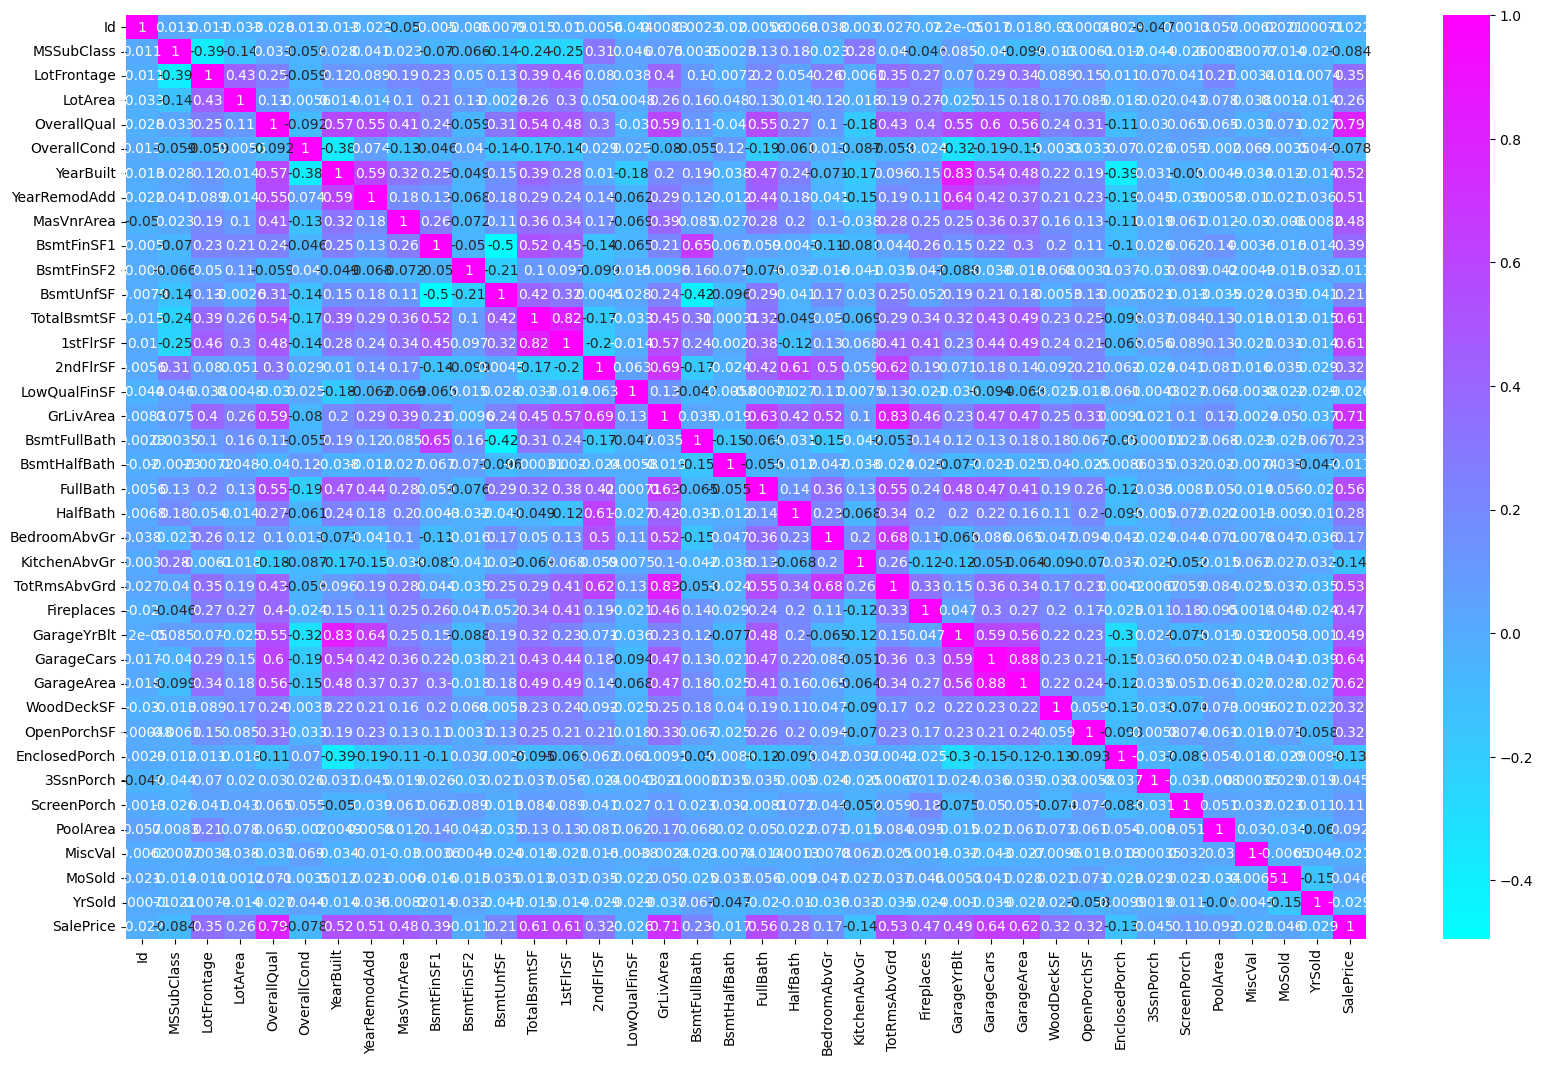

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='cool')

# Data cleaning

In [ ]:
# vérifier la duplication
df.duplicated().sum()

0

In [ ]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
#Supprimer la colunne des identifiant puisqu'elle est insignificatif
df.drop(columns=['Id'],inplace=True)

In [ ]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
 #find columns that contain only zeros
cols = [col for col in categorical_cols]

# drop columns with only zeros
df = df.drop(cols, axis=1)
df.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

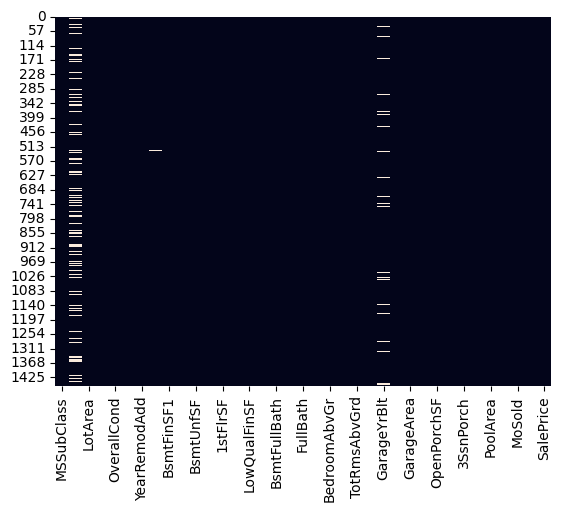

In [ ]:
#création d'une carte de chaleur (heatmap) qui visualise les valeurs manquantes (NaN) dans un dataframe
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
N = 7
#supprimer toutes les lignes de df qui ont au moins un NaN sauf celles qui ont au moins N valeurs non NaN
df2= df.dropna(thresh=len(df.columns) - N)

In [ ]:
def manquante(L,df):
  for x in L:
    if is_numeric_dtype(df[x]):
      df[x] = df[x].replace(np.NaN, df[x].mean())
L=list(df.columns)
df=manquante(L,df2)

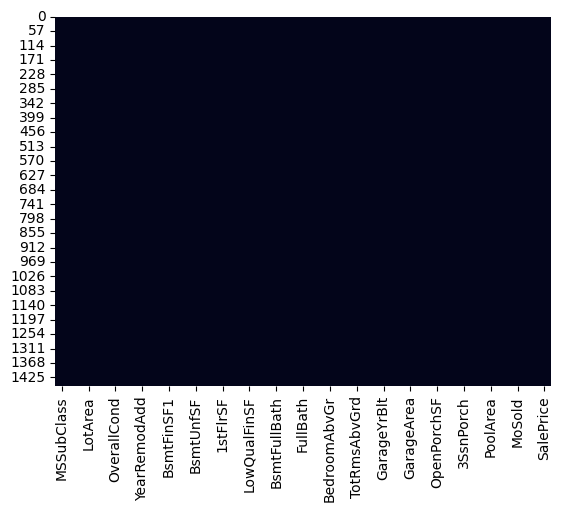

In [ ]:
#création d'une carte de chaleur (heatmap) qui visualise les valeurs manquantes (NaN) dans un dataframe
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [ ]:
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
# Boucle pour examiner les valeurs aberrantes pour chaque variable
for col in df2.columns:
    # Vérifier si la variable est numérique
    if df2[col].dtype != 'object':
        q1, q3 = np.percentile(df2[col], [25, 75])
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        outliers = df2[(df2[col] > upper_bound) | (df2[col] < lower_bound)]

        print('Valeurs aberrantes dans ' + col + ' :', len(outliers))

        # Supprimer les valeurs aberrantes
        df = df2[(df2[col] <= upper_bound) & (df2[col] >= lower_bound)]
    else:
        print('La variable ' + col + ' est de type chaîne de caractères et ne peut pas être utilisée pour calculer les valeurs aberrantes.')

Valeurs aberrantes dans MSSubClass : 103
Valeurs aberrantes dans LotFrontage : 106
Valeurs aberrantes dans LotArea : 69
Valeurs aberrantes dans OverallQual : 2
Valeurs aberrantes dans OverallCond : 125
Valeurs aberrantes dans YearBuilt : 7
Valeurs aberrantes dans YearRemodAdd : 0
Valeurs aberrantes dans MasVnrArea : 98
Valeurs aberrantes dans BsmtFinSF1 : 7
Valeurs aberrantes dans BsmtFinSF2 : 167
Valeurs aberrantes dans BsmtUnfSF : 29
Valeurs aberrantes dans TotalBsmtSF : 61
Valeurs aberrantes dans 1stFlrSF : 20
Valeurs aberrantes dans 2ndFlrSF : 2
Valeurs aberrantes dans LowQualFinSF : 26
Valeurs aberrantes dans GrLivArea : 31
Valeurs aberrantes dans BsmtFullBath : 1
Valeurs aberrantes dans BsmtHalfBath : 82
Valeurs aberrantes dans FullBath : 0
Valeurs aberrantes dans HalfBath : 0
Valeurs aberrantes dans BedroomAbvGr : 35
Valeurs aberrantes dans KitchenAbvGr : 68
Valeurs aberrantes dans TotRmsAbvGrd : 30
Valeurs aberrantes dans Fireplaces : 5
Valeurs aberrantes dans GarageYrBlt : 1
V

In [ ]:
# Remplacer les valeurs aberrantes par la valeur médiane
# Sélectionner les colonnes de type numérique
num_vars = df.select_dtypes(include=['float', 'int']).columns.tolist()
# Parcourir les variables numériques pour remplacer les valeurs aberrantes par la médiane
for var in num_vars:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[var] = df[var].mask((df[var] < lower_bound) | (df[var] > upper_bound), df[var].median())

<ipython-input-88-90a907ccabfe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].mask((df[var] < lower_bound) | (df[var] > upper_bound), df[var].median())
<ipython-input-88-90a907ccabfe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = df[var].mask((df[var] < lower_bound) | (df[var] > upper_bound), df[var].median())
<ipython-input-88-90a907ccabfe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
# Trouver les paires de variables qui ont une corrélation supérieure à un seuil donné
threshold = 0.82
corr_matrix = df.corr()
  # seuil de corrélation
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Afficher les paires de variables corrélées
print("Paires de variables corrélées : ")
for pair in corr_pairs:
    print(pair)

Paires de variables corrélées : 
('TotalBsmtSF', '1stFlrSF')
('GarageCars', 'GarageArea')


In [ ]:
df.drop(columns=['GarageCars'],inplace=True)
df.drop(columns=['1stFlrSF'],inplace=True)
df.drop(columns=['OverallQual'],inplace=True)

<ipython-input-90-8739e314e955>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['GarageCars'],inplace=True)
<ipython-input-90-8739e314e955>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['1stFlrSF'],inplace=True)
<ipython-input-90-8739e314e955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OverallQual'],inplace=True)


In [ ]:
df.to_csv('CleanedData3.csv', index=False)

# Data Selection

1. Backward Stepwise Selection

In [ ]:
# diviser le dataset en variables explicatives et variable cible
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
# initialiser les variables pour la sélection backward stepwise
included = list(range(X.shape[1]))
while True:
    changed = False
    # créer une régression linéaire avec les variables incluses
    lm = LinearRegression()
    lm.fit(X[:, included], Y)
    # calculer les coefficients de régression
    coef = np.zeros(X.shape[1])
    coef[included] = lm.coef_
    # trouver la variable ayant le coefficient le plus petit
    worst_coef = np.argmin(coef)
    if coef[worst_coef] < 0:
        included.remove(worst_coef)
        changed = True
    if not changed:
        break

# afficher les variables incluses dans le modèle final
print("Variables incluses:", included)

Variables incluses: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31]


2. Correlation Selection

In [ ]:
# Trouver les paires de variables qui ont une corrélation supérieure à un seuil donné
threshold = 0.4
corr_matrix = df.corr()
  # seuil de corrélation
corr_pairs = []
for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[33, j]) > threshold:
            corr_pairs.append((corr_matrix.columns[33], corr_matrix.columns[j]))

# Afficher les paires de variables corrélées
print("Paires de variables corrélées : ")
for pair in corr_pairs:
    print(pair)

Paires de variables corrélées : 
('SalePrice', 'YearBuilt')
('SalePrice', 'YearRemodAdd')
('SalePrice', 'TotalBsmtSF')
('SalePrice', 'GrLivArea')
('SalePrice', 'FullBath')
('SalePrice', 'TotRmsAbvGrd')
('SalePrice', 'Fireplaces')
('SalePrice', 'GarageYrBlt')
('SalePrice', 'GarageArea')
('SalePrice', 'SalePrice')


In [ ]:
# Créer une liste de noms de colonnes que vous voulez conserver
cols_to_keep = ['YearBuilt','YearRemodAdd','TotalBsmtSF', 'GrLivArea','FullBath','TotRmsAbvGrd','GarageArea',  'SalePrice']
# Sélectionner uniquement les colonnes de la liste 'cols_to_keep'
df_final = df[cols_to_keep]




In [ ]:
df_final.to_csv('Datafinal.csv', index=False)

# Modeling

# Regression Linéaire

In [ ]:
# Sélectionner les variables explicatives et la variable cible
X = df_final[['TotRmsAbvGrd','TotRmsAbvGrd','YearBuilt','YearRemodAdd','TotalBsmtSF', 'GrLivArea','FullBath', 'GarageArea']]
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1119, 8) (280, 8) (1119,) (280,)


1. Régression linéaire Simple

Coefficients:  [84.5037125]
Intercept:  78978.22529175295
R-squared:  0.25053041039599133
RMSE:  46763.60777417459


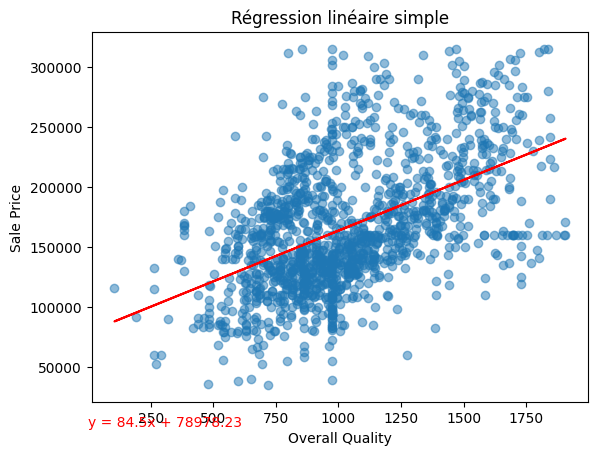

In [ ]:
# Créer une variable explicative X et une variable cible y
X1 = df_final[["TotalBsmtSF"]] # ajouter des crochets pour créer une dataframe à partir d'une seule colonne
y1 = df_final["SalePrice"]
# Créer un objet de modèle de régression linéaire
model1 = LinearRegression()
# Adapter le modèle aux données
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)
# Extraire les coefficients de régression et les mesures de performance
coefficients1 = model1.coef_
intercept1 = model1.intercept_
R_squared1 = r2_score(y1, y_pred1)
RMSE1 = np.sqrt(mean_squared_error(y1, y_pred1))

# Afficher les résultats
print("Coefficients: ", coefficients1)
print("Intercept: ", intercept1)
print("R-squared: ", R_squared1)
print("RMSE: ", RMSE1)

# Afficher la visualisation graphique de la régression linéaire simple

plt.scatter(X1, y1, alpha=0.5)
plt.plot(X1, model1.predict(X1), color='red')
plt.title('Régression linéaire simple')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.text(-1.5,0.5, 'y = {}x + {}'.format(round(coefficients1[0], 2), round(intercept1, 2)), color='red')
plt.show()


Coefficients:  [79.67607833]
Intercept:  50867.81389275711
R-squared:  0.3935914355299426
RMSE:  42064.29984950295


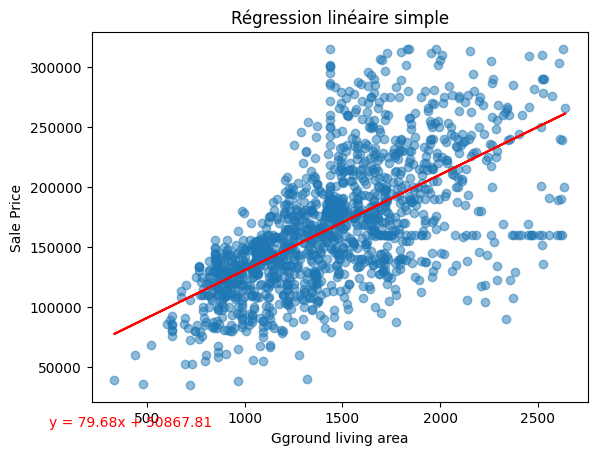

In [ ]:
# Créer une variable explicative X et une variable cible y
X2 = df_final[["GrLivArea"]]
y2 = df_final["SalePrice"]

# Créer un objet de modèle de régression linéaire
model = LinearRegression()

# Adapter le modèle aux données
model.fit(X2, y2)
y_pred2=model.predict(X2)
# Extraire les coefficients de régression et les mesures de performance
coefficients = model.coef_
intercept = model.intercept_
R_squared = r2_score(y2, y_pred2)
RMSE = np.sqrt(mean_squared_error(y2,y_pred2))

# Afficher les résultats
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)
print("R-squared: ", R_squared)
print("RMSE: ", RMSE)

# Afficher la visualisation graphique de la régression linéaire simple
plt.scatter(X2, y2, alpha=0.5)
plt.plot(X2, y_pred2, color='red')
plt.title('Régression linéaire simple')
plt.xlabel('Gground living area')
plt.ylabel('Sale Price')
plt.text(-1.5,0.5, 'y = {}x + {}'.format(round(coefficients[0], 2), round(intercept, 2)), color='red')
plt.show()

In [ ]:
# Modèle 1 : Régression linéaire avec toutes les variables
mse1 = mean_squared_error(y1, y_pred1)
print(f"Modèle 1 MSE : {mse1}")

# Modèle 2 : Régression linéaire sans TotalBsmtSF
mse = mean_squared_error(y2,y_pred2)
print(f"Modèle 2 MSE : {mse}")

# Comparer les modèles en utilisant le critère d'information d'Akaike (AIC)
n = len(X_train)
aic1 = 2 * (3 + 1) + n * np.log(mse1)
aic2 = 2 * (2 + 1) + n * np.log(mse)
print(f"Modèle 1 AIC : {aic1}")
print(f"Modèle 2 AIC : {aic2}")

Modèle 1 MSE : 2186835012.056842
Modèle 2 MSE : 1769405321.828894
Modèle 1 AIC : 24072.901950615607
Modèle 2 AIC : 23833.884563446267


2 . Régression linéaire Multiple

Coefficients:  [1202.85946245 1202.85946245  421.16175733  476.65364334   30.87801482
   45.18428196  237.80254044   48.45168211]
Intercept:  -1744139.5799988033
R-squared (train):  0.6718002349413061
RMSE (train):  31218.761542442768
R-squared (test):  0.6676401138632924
RMSE (test):  29933.759746300006
Équation de la régression linéaire multiple : SalePrice = -1744139.58 + 79.68*TotRmsAbvGrd


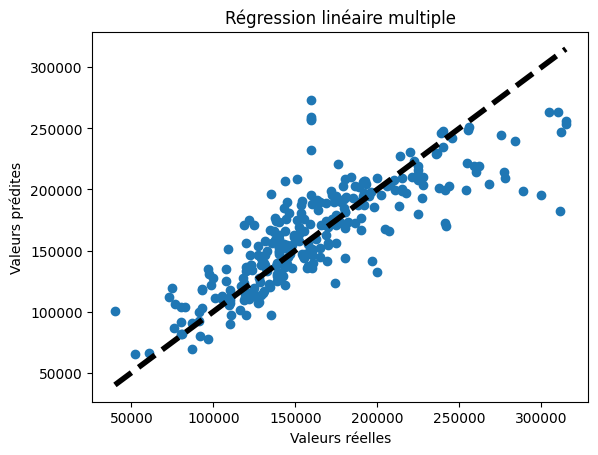

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Créer un objet de modèle de régression linéaire
model1 = LinearRegression()

# Adapter le modèle aux données d'apprentissage
model1.fit(X_train, y_train)

# Extraire les coefficients de régression et les mesures de performance sur les données d'apprentissage
coefficients1 = model1.coef_
intercept1 = model1.intercept_
R_squared_train1 = r2_score(y_train, model1.predict(X_train))
RMSE_train1 = np.sqrt(mean_squared_error(y_train, model1.predict(X_train)))

# Extraire les mesures de performance sur les données de test
R_squared_test1 = r2_score(y_test, model1.predict(X_test))
RMSE_test1 = np.sqrt(mean_squared_error(y_test, model1.predict(X_test)))

# Afficher les résultats
print("Coefficients: ", coefficients1)
print("Intercept: ", intercept1)
print("R-squared (train): ", R_squared_train1)
print("RMSE (train): ", RMSE_train1)
print("R-squared (test): ", R_squared_test1)
print("RMSE (test): ", RMSE_test1)

# Équation de la régression linéaire multiple
equation = 'SalePrice = {:.2f}'.format(intercept1)
for i in range(len(coefficients)):
    equation += ' + {:.2f}*{}'.format(coefficients[i], X.columns[i])
print('Équation de la régression linéaire multiple :', equation)

# Visualisation de la régression linéaire multiple
y_pred1 = model1.predict(X_test)
plt.scatter(y_test, y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire multiple')
plt.show()

In [ ]:
lr = LinearRegression()

# utiliser la sélection backward stepwise avec une validation croisée à 6 plis
selector = RFE(lr, n_features_to_select=6, step=1)
selector = selector.fit(X, y)

# afficher les caractéristiques sélectionnées
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['TotRmsAbvGrd', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'FullBath',
       'GarageArea'],
      dtype='object')


Coefficients:  [2309.17238742  495.41587081  456.27559353   47.48748825 2048.38484758
   61.37643471]
Intercept:  -1829424.0063139775
R-squared (train):  0.6465780428839434
RMSE (train):  32396.142552206624
R-squared (test):  0.6399448551465944
RMSE (test):  31155.984444856727
Équation de la régression linéaire multiple : SalePrice = -1829424.01 + 2309.17*TotRmsAbvGrd + 495.42*YearBuilt + 456.28*YearRemodAdd + 47.49*GrLivArea + 2048.38*FullBath + 61.38*GarageArea


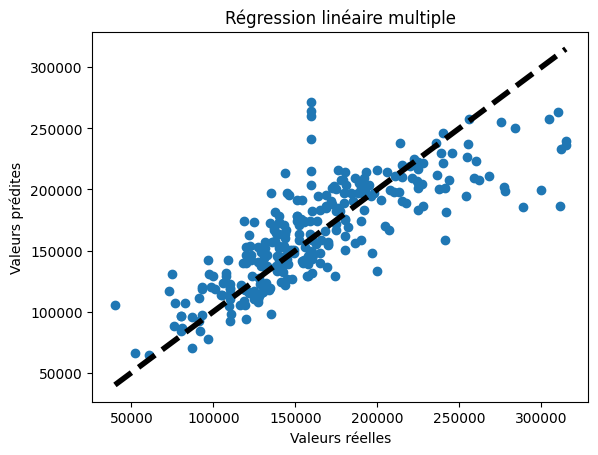

In [ ]:
# Sélectionner les variables explicatives et la variable cible
X = df_final[['TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'GrLivArea','FullBath', 'GarageArea']]
y = df_final['SalePrice']

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Créer un objet de modèle de régression linéaire
model2 = LinearRegression()

# Adapter le modèle aux données d'apprentissage
model2.fit(X_train, y_train)

# Extraire les coefficients de régression et les mesures de performance sur les données d'apprentissage
coefficients2 = model2.coef_
intercept2 = model2.intercept_
R_squared_train2 = r2_score(y_train, model2.predict(X_train))
RMSE_train2 = np.sqrt(mean_squared_error(y_train, model2.predict(X_train)))

# Extraire les mesures de performance sur les données de test
R_squared_test2 = r2_score(y_test, model2.predict(X_test))
RMSE_test2 = np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))

# Afficher les résultats
print("Coefficients: ", coefficients2)
print("Intercept: ", intercept2)
print("R-squared (train): ", R_squared_train2)
print("RMSE (train): ", RMSE_train2)
print("R-squared (test): ", R_squared_test2)
print("RMSE (test): ", RMSE_test2)

# Équation de la régression linéaire multiple
equation = 'SalePrice = {:.2f}'.format(intercept2)
for i in range(len(coefficients2)):
    equation += ' + {:.2f}*{}'.format(coefficients2[i], X.columns[i])
print('Équation de la régression linéaire multiple :', equation)

# Visualisation de la régression linéaire multiple
y_pred2 = model2.predict(X_test)
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire multiple')
plt.show()

3. Evaluation

In [ ]:
# Modèle 1 : Régression linéaire avec toutes les variables
mse1 = mean_squared_error(y_test, y_pred1)
print(f"Modèle 1 MSE : {mse1}")

# Modèle 2 : Régression linéaire sans TotalBsmtSF
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Modèle 2 MSE : {mse2}")

# Comparer les modèles en utilisant le critère d'information d'Akaike (AIC)
n = len(X_train)
aic1 = 2 * (3 + 1) + n * np.log(mse1)
aic2 = 2 * (2 + 1) + n * np.log(mse2)
print(f"Modèle 1 AIC : {aic1}")
print(f"Modèle 2 AIC : {aic2}")

Modèle 1 MSE : 896029972.5492107
Modèle 2 MSE : 970695366.7281544
Modèle 1 AIC : 23074.489068089908
Modèle 2 AIC : 23162.052511766724


# Regression Régularisée

In [ ]:
# Sélectionner les variables explicatives et la variable cible
X = df_final[['TotRmsAbvGrd','YearBuilt','YearRemodAdd','TotalBsmtSF', 'GrLivArea','FullBath', 'GarageArea']]
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 7) (280, 7) (1119,) (280,)


1. Ridge

In [ ]:
# Initialisation du modèle Ridge
ridge = Ridge()
# Recherche des meilleurs hyperparamètres avec GridSearchCV
params = {'alpha': np.logspace(-3, 3, 7)}
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_ridge.fit(X_train, y_train)
# Prédiction sur le jeu de test
ridge_pred = grid_ridge.predict(X_test)
# Calcul de la RMSE
rmse1 = (np.sqrt(mean_squared_error(y_test, ridge_pred)))
# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, ridge_pred)
# Calculate the mean squared error of the prediction
mse = mean_squared_error(y_test, ridge_pred)
#printing the results
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse1))
print('  -MSE is {}'.format(mse))
print('  -R2 score is {}'.format(r2))
print("\n")

The model performance for training set is:
  -RMSE is 29871.962883070526
  -MSE is 892334166.4875431
  -R2 score is 0.6690109805970741




2. Lasso

In [ ]:
# Initialisation du modèle Lasso
lasso = Lasso()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
params = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(lasso, params, cv=5)
grid_lasso.fit(X_train, y_train)

# Prédiction sur le jeu de test
lasso_pred = grid_lasso.predict(X_test)
# Calcul de la RMSE
rmse2 = (np.sqrt(mean_squared_error(y_test, lasso_pred)))
# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, lasso_pred)
# Calculate the mean squared error of the prediction
mse = mean_squared_error(y_test, lasso_pred)
#printing the results
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse2))
print('  -MSE is {}'.format(mse))
print('  -R2 score is {}'.format(r2))
print("\n")


The model performance for training set is:
  -RMSE is 29878.606342490362
  -MSE is 892731116.9695053
  -R2 score is 0.6688637417534766




3. ElasticNet

In [ ]:
# Initialisation du modèle ElasticNet
elastic = ElasticNet()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
params = {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': [0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 0.99]}
grid_elastic = GridSearchCV(elastic, params, cv=5)
grid_elastic.fit(X_train, y_train)

# Prédiction sur le jeu de test
elastic_pred = grid_elastic.predict(X_test)
# Calcul de la RMSE
rmse3 = (np.sqrt(mean_squared_error(y_test, elastic_pred)))
# Calculate the R-squared score of the predictions
r2 = r2_score(y_test,elastic_pred)
# Calculate the mean squared error of the prediction
mse = mean_squared_error(y_test, elastic_pred)
#printing the results
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse3))
print('  -MSE is {}'.format(mse))
print('  -R2 score is {}'.format(r2))
print("\n")

The model performance for training set is:
  -RMSE is 29853.833285031862
  -MSE is 891251361.8104763
  -R2 score is 0.6694126198839323




In [ ]:
# Affichage des RMSE
print("Ridge RMSE: ", rmse1)
print("Lasso RMSE: ", rmse2)
print("ElasticNet RMSE: ", rmse3)

Ridge RMSE:  29871.962883070526
Lasso RMSE:  29878.606342490362
ElasticNet RMSE:  29853.833285031862


In [ ]:
# Affichage des coefficients de Ridge
ridge_coef = pd.Series(grid_ridge.best_estimator_.coef_, index=X.columns)
print("Ridge selected variables:")
print(ridge_coef[ridge_coef!=0])

# Affichage des coefficients de Lasso
lasso_coef = pd.Series(grid_lasso.best_estimator_.coef_, index=X.columns)
print("Lasso selected variables:")
print(lasso_coef[lasso_coef!=0])

# Affichage des coefficients d'ElasticNet
elastic_coef = pd.Series(grid_elastic.best_estimator_.coef_, index=X.columns)
print("ElasticNet selected variables:")
print(elastic_coef[elastic_coef!=0])

Ridge selected variables:
TotRmsAbvGrd    1159.437916
YearBuilt        417.068599
YearRemodAdd     476.035285
TotalBsmtSF       30.917528
GrLivArea         48.443839
FullBath         109.432918
GarageArea        48.457008
dtype: float64
Lasso selected variables:
TotRmsAbvGrd    1211.596848
YearBuilt        417.356038
YearRemodAdd     475.149438
TotalBsmtSF       30.940845
GrLivArea         48.386307
GarageArea        48.493735
dtype: float64
ElasticNet selected variables:
TotRmsAbvGrd    185.268011
YearBuilt       412.301057
YearRemodAdd    465.788450
TotalBsmtSF      31.039977
GrLivArea        51.049611
FullBath         20.236219
GarageArea       48.799260
dtype: float64


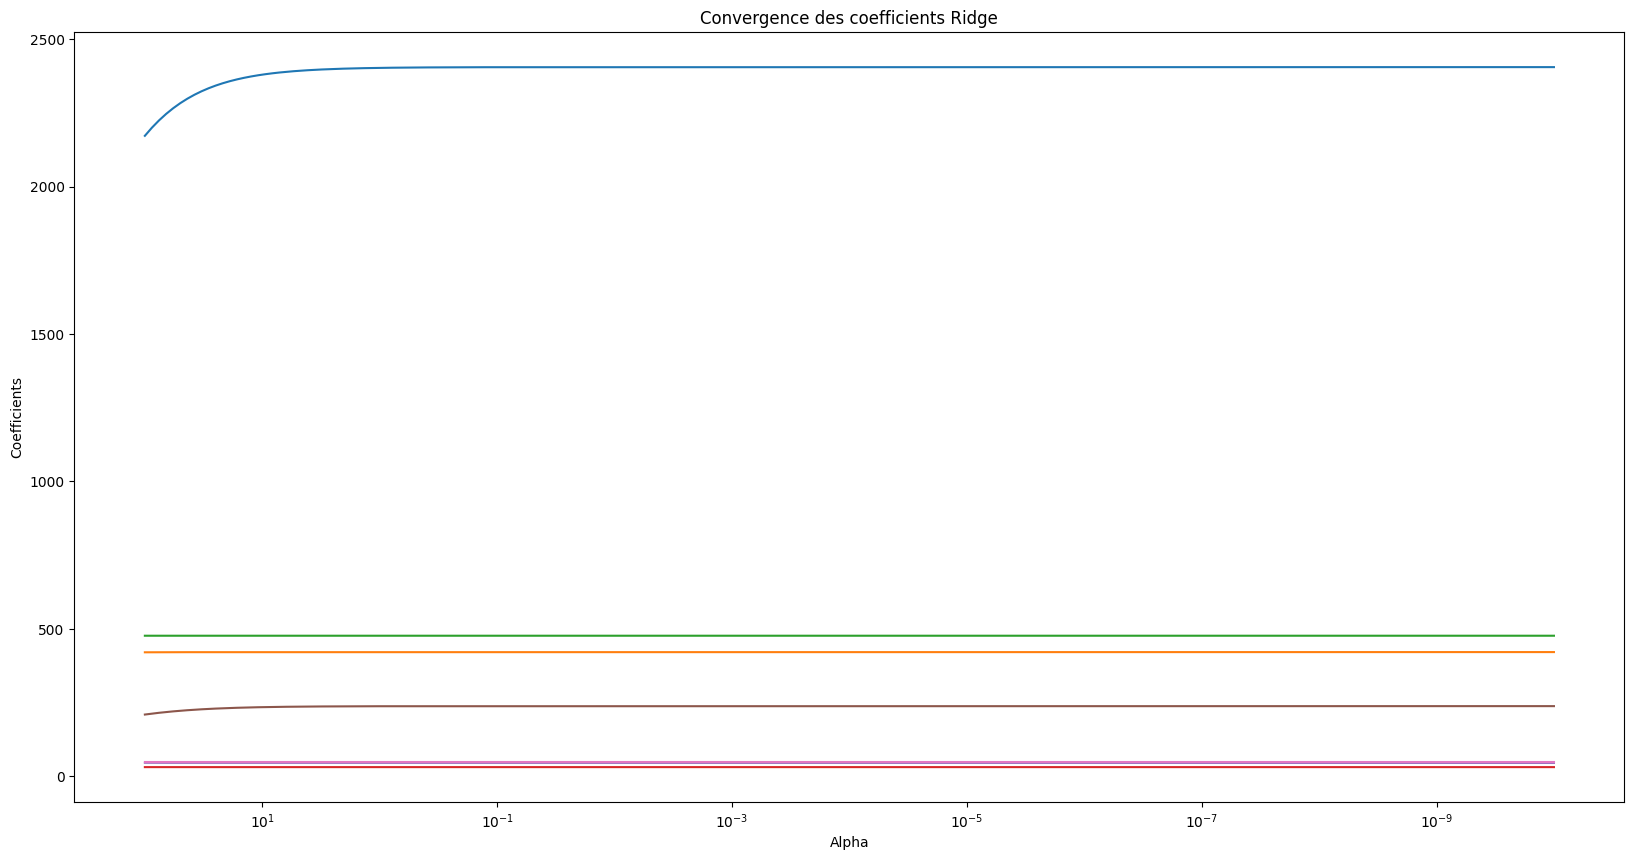

In [ ]:
# Initialisation du modèle Ridge avec un alpha de 1
ridge = Ridge(alpha=1)

# Entraînement du modèle
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Affichage du graphique de convergence
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Convergence des coefficients Ridge')
plt.axis('tight')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+11, tolerance: 3.323e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.398e+11, tolerance: 3.323e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.948e+11, tolerance: 3.323e+08

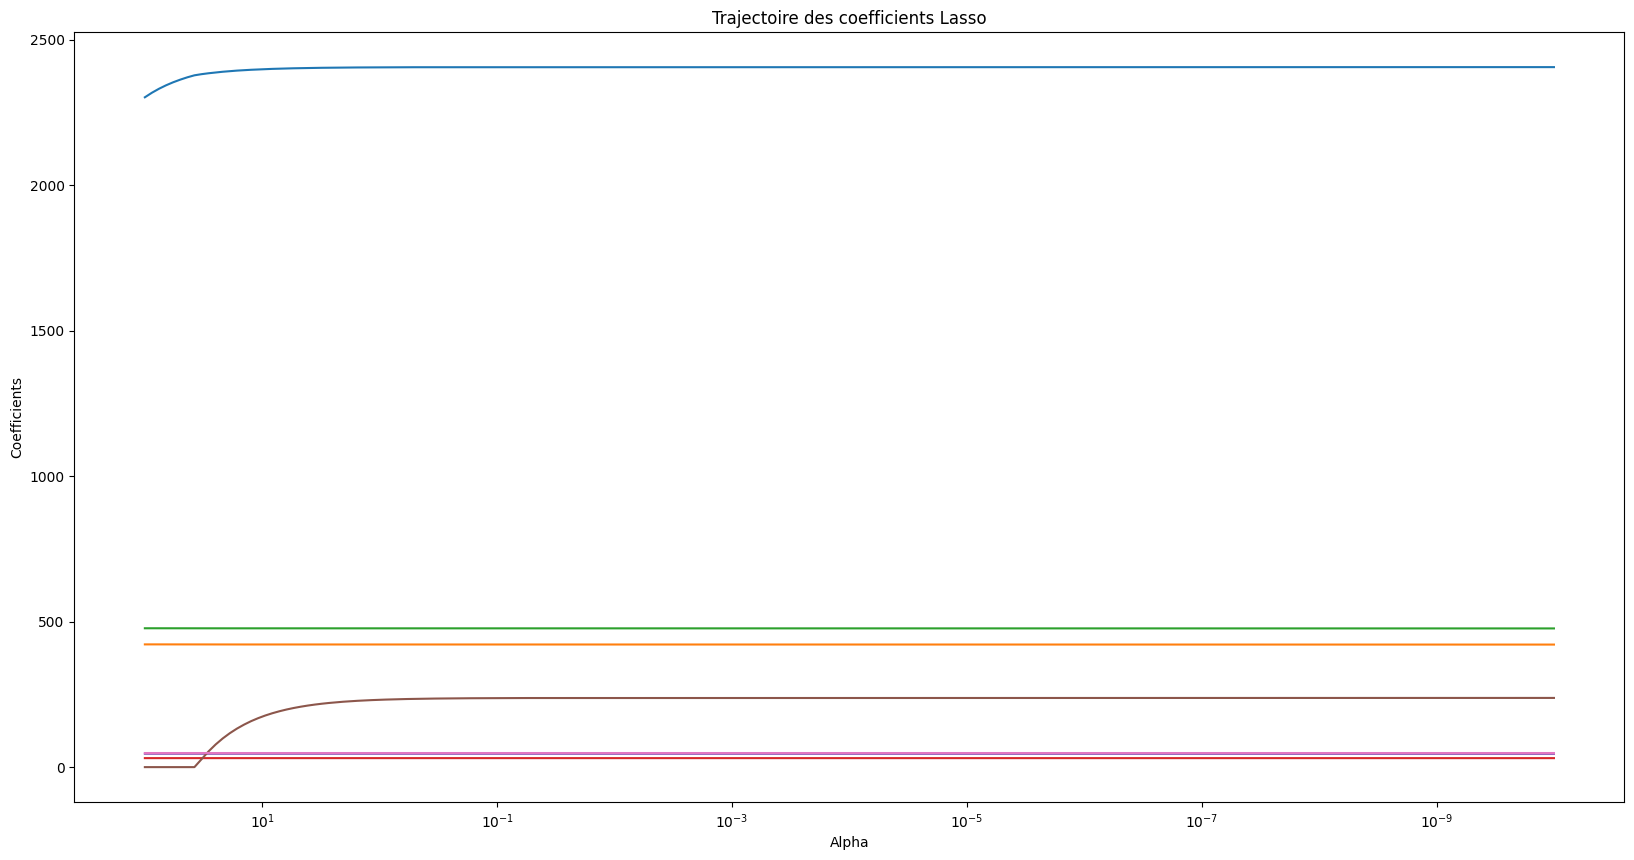

In [ ]:
# Initialisation du modèle Lasso avec un alpha de 1
lasso = Lasso(alpha=1)

# Entraînement du modèle
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
coefs_lasso = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

# Affichage du graphique de trajectoire Lasso
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Trajectoire des coefficients Lasso')
plt.axis('tight')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.483e+11, tolerance: 3.323e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.234e+11, tolerance: 3.323e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+11, tolerance: 3.323e+08

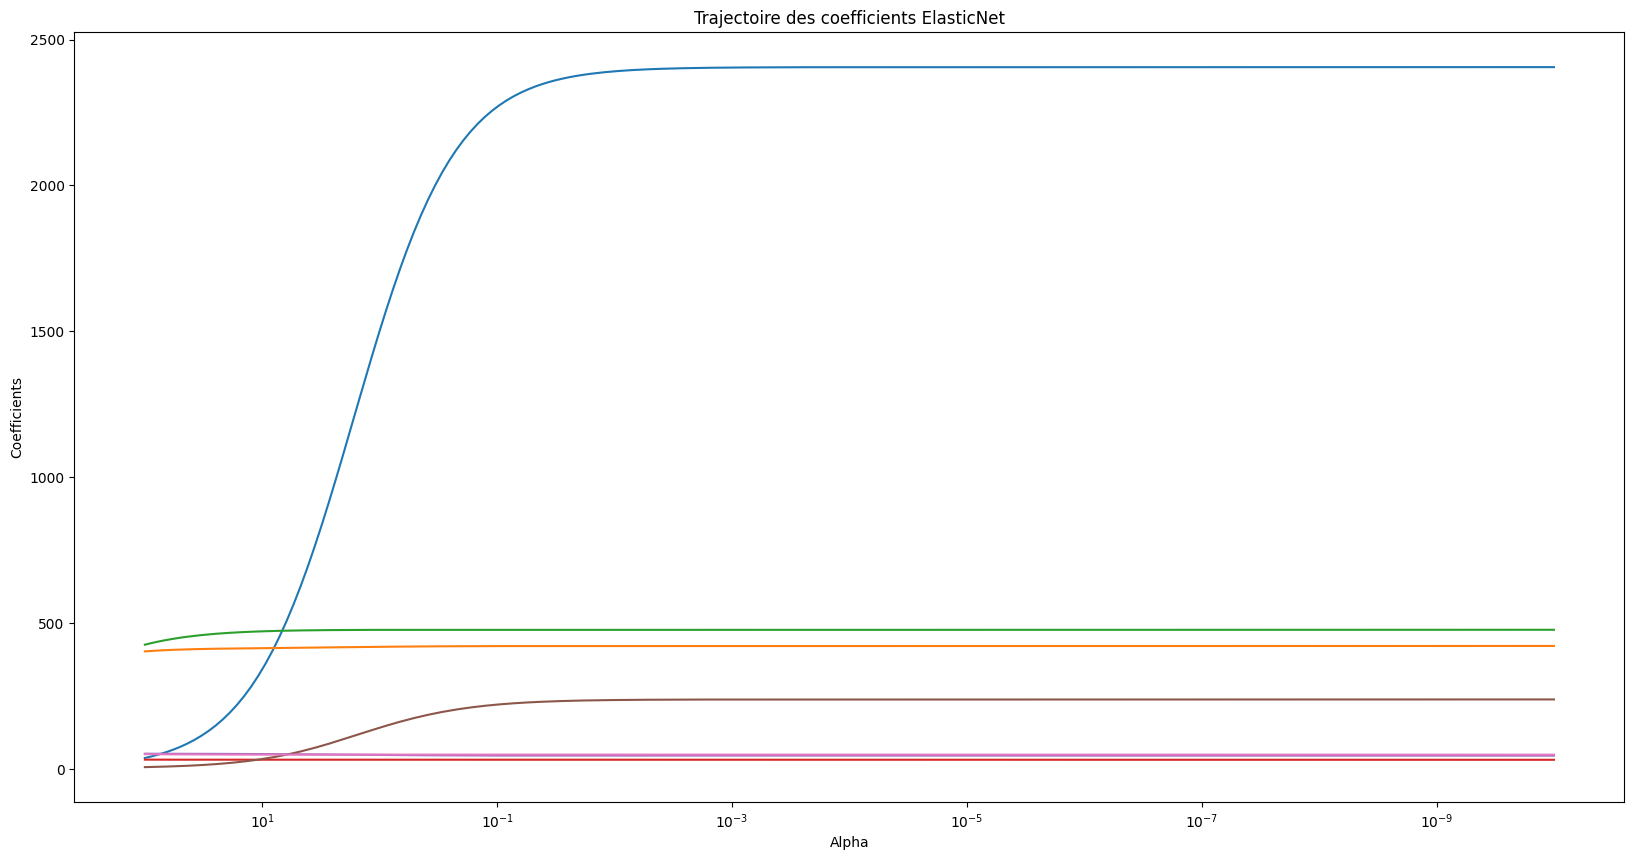

In [ ]:
# Initialisation du modèle ElasticNet avec un alpha de 1 et un ratio L1/L2 de 0,5
enet = ElasticNet(alpha=1, l1_ratio=0.5)

# Entraînement du modèle
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
coefs_enet = []
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_train, y_train)
    coefs_enet.append(enet.coef_)

# Affichage du graphique de trajectoire ElasticNet
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, coefs_enet)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Trajectoire des coefficients ElasticNet')
plt.axis('tight')
plt.show()

# Régression non Lineaire

1. Ajustement Exponentiel

In [ ]:

# Sélectionner les variables explicatives et la variable cible
X = df_final[['TotRmsAbvGrd','YearBuilt','YearRemodAdd','TotalBsmtSF', 'GrLivArea','FullBath', 'GarageArea']]
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
simple=X_train[ 'GrLivArea']

#converting it  into a Pandas DataFrame
#reshape the data into a 2-dimensional array with one column
X_simple = pd.DataFrame(simple,columns=['GrLivArea']).values.reshape(-1, 1)
test_simple=X_test[ 'GrLivArea']
X_test_simple= pd.DataFrame(test_simple,columns=['GrLivArea']).values.reshape(-1, 1)
#showing the dimensions of the array
X_test_simple.shape


(1119, 7) (280, 7) (1119,) (280,)


(280, 1)

In [ ]:
# Create an instance of the linear regression model
model = LinearRegression()
# Train the model using the training data
X_train_log = np.log(X_simple)
y_train_log = np.log(y_train)
X_test_log = np.log(X_test_simple)
y_test_log = np.log(y_test)

In [ ]:
# Make predictions on the test data
#converting the result  into a Pandas DataFrame
model=model.fit(X_simple  ,y_train_log)
y_pred_simple =  pd.DataFrame(model.predict(X_test_simple),columns=['GrLivArea'])
rmse = (np.sqrt(mean_squared_error(y_test_log,y_pred_simple)))
# Calculate the R-squared score of the predictions
r21= r2_score(y_test_log,y_pred_simple)
# Calculate the mean squared error of the predictions
mse1 = mean_squared_error(y_test_log,y_pred_simple)
#printing the results
print("les coefficients : ",model.coef_)
print(model.intercept_)
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse))
print('  -MSE is {}'.format(mse1))
print('  -R2 score is {}'.format(r21))
print("\n")

les coefficients :  [0.00049243]
11.255969473415313
The model performance for training set is:
  -RMSE is 0.24730304501789427
  -MSE is 0.061158796075122646
  -R2 score is 0.42132479237873155




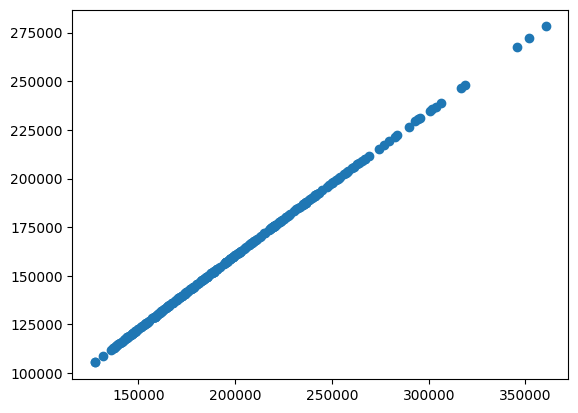

In [ ]:
import matplotlib.pyplot as plt
y0 = np.exp(y_pred_simple)
#c2=76495.03858831237 * np.exp( 0.0004983852420008854 *X_test_simple )
x0 = np.exp(0.00052771*X_test_simple) * np.exp(11.423714102752408)
plt.plot(x0,y0,"o")


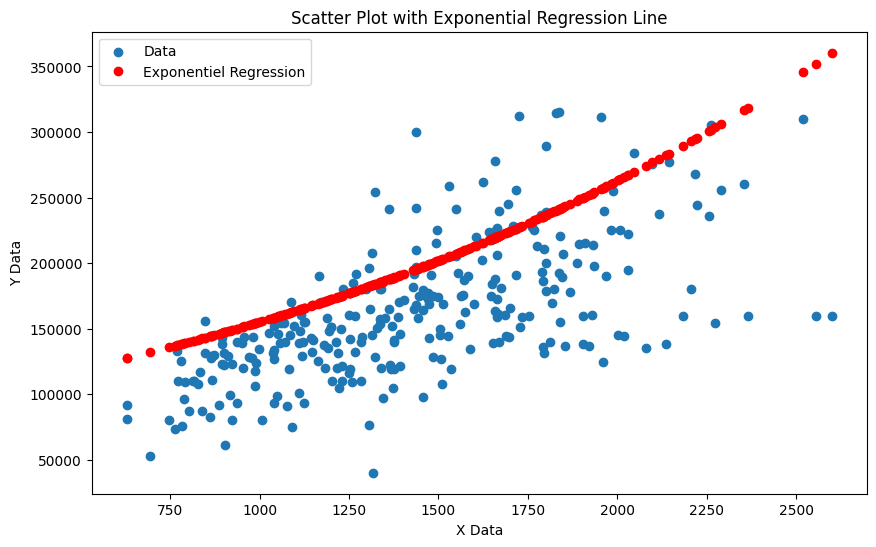

In [ ]:
import matplotlib.pyplot as plt
y0 = np.exp(y_pred_simple)
x0 = np.exp(0.00052771*X_test_simple) * np.exp(11.423714102752408)
# Plot the data points as a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_test_simple, y_test  ,label="Data")
# Plot the logarithmic regression line

plt.plot(X_test_simple,x0, 'or', label="Exponentiel Regression")

# Add labels and legend to the plot
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Scatter Plot with Exponential Regression Line")
plt.legend()

# Show the plot
plt.show()
#plt.plot(x0,y0,"o")


2. Ajustement Puissance

In [ ]:
model=model.fit(X_train_log  ,y_train_log)
y_pred_simple =  pd.DataFrame(model.predict(X_test_log),columns=['GrLivArea'])
rmse = (np.sqrt(mean_squared_error(y_test_log,y_pred_simple)))
# Calculate the R-squared score of the predictions
r22 = r2_score(y_test_log,y_pred_simple)
# Calculate the mean squared error of the predictions
mse2 = mean_squared_error(y_test_log,y_pred_simple)
#printing the results
print("les coefficients : ",model.coef_)
print(model.intercept_)
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse))
print('  -MSE is {}'.format(mse2))
print('  -R2 score is {}'.format(r22))
print("\n")

les coefficients :  [0.73399844]
6.660101120420158
The model performance for training set is:
  -RMSE is 0.2410283018294537
  -MSE is 0.05809464228279023
  -R2 score is 0.45031734857266736




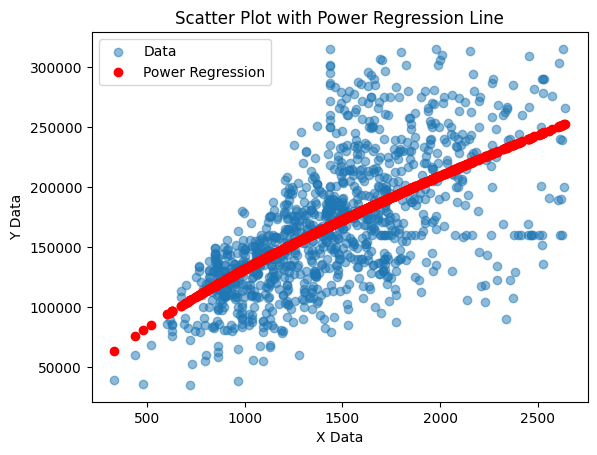

In [ ]:
a=y_train.flatten()
# Define the power function for regression
def power_func(x, a, b):
    return a * np.power(x, b)

# Perform power regression on the data
popt, pcov = curve_fit(power_func, X_simple.flatten(), y_train, maxfev=5000)

# Plot the data points as a scatter plot
plt.scatter(X_simple.flatten(), y_train, alpha=0.5, label="Data")

# Plot the power regression line

plt.plot(X_simple.flatten(), power_func(X_simple.flatten(), *popt), 'or', label="Power Regression")


# Add labels and legend to the plot
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Scatter Plot with Power Regression Line")
plt.legend()

# Show the plot
plt.show()



3. Ajustement Logarithmique

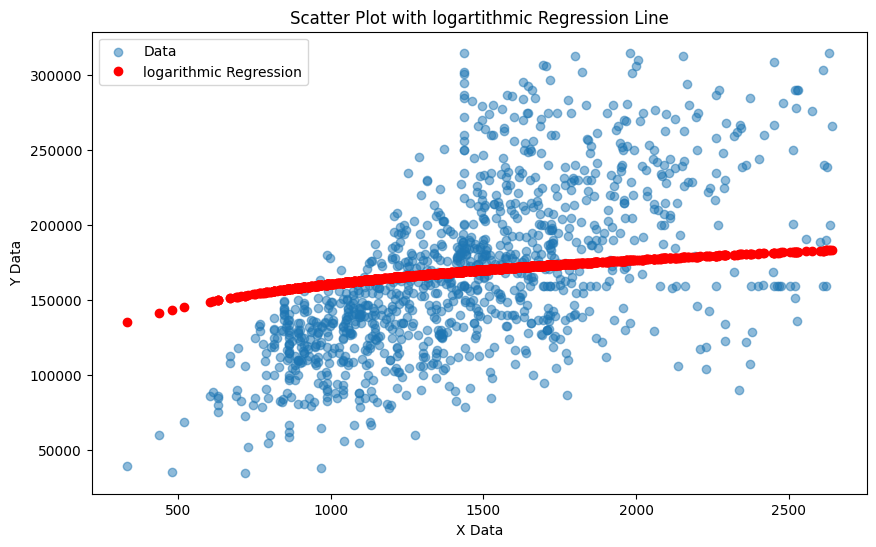

In [ ]:
# Define the logarithmic function for regression
def log_func(x, a):
    return a * np.log(x)



# Perform logarithmic regression on the data
popt, pcov = curve_fit(log_func,X_simple.flatten(), y_train)

# Plot the data points as a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_simple.flatten(), y_train, alpha=0.5 ,label="Data")

# Plot the logarithmic regression line

plt.plot(X_simple.flatten(), log_func(X_simple.flatten(), *popt), 'or', label="logarithmic Regression")

# Add labels and legend to the plot
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.title("Scatter Plot with logartithmic Regression Line")
plt.legend()

# Show the plot
plt.show()


In [ ]:
model=model.fit(X_train_log  ,y_train)
y_pred_simple =  pd.DataFrame(model.predict(X_test_log),columns=['GrLivArea'])
rmse = (np.sqrt(mean_squared_error(y_test,y_pred_simple)))
# Calculate the R-squared score of the predictions
r23 = r2_score(y_test,y_pred_simple)
# Calculate the mean squared error of the predictions
mse3 = mean_squared_error(y_test,y_pred_simple)
#printing the results
print("les coefficients : ",model.coef_)
print(model.intercept_)
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse))
print('  -MSE is {}'.format(mse3))
print('  -R2 score is {}'.format(r23))
print("\n")

les coefficients :  [114261.33202918]
-659645.5873914409
The model performance for training set is:
  -RMSE is 39253.35286257167
  -MSE is 1540825710.9535637
  -R2 score is 0.42846927721392425




4. Ajustement Polynomiale

In [ ]:
degree=2
mod = PolynomialFeatures(degree=degree)
X_poly =mod.fit_transform(X_simple)
X_test_poly =mod.fit_transform(X_test_simple)
regression_model = LinearRegression()
regression_model.fit(X_poly,y_train)
y_pred_simple =  pd.DataFrame(regression_model.predict(X_test_poly),columns=['GrLivArea'])
#Calculate the root mean squared error of the predictions
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_simple)))
# Calculate the R-squared score of the predictions
r24 = r2_score(y_test,y_pred_simple)
# Calculate the mean squared error of the predictions
mse4 = mean_squared_error(y_test,y_pred_simple)
#printing the results
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse))
print('  -MSE is {}'.format(mse4))
print('  -R2 score is {}'.format(r24))
print("\n")

The model performance for training set is:
  -RMSE is 39177.91360528911
  -MSE is 1534908914.4634979
  -R2 score is 0.43066396474445134




In [ ]:
degree=3
mod = PolynomialFeatures(degree=degree)
X_poly =mod.fit_transform(X_simple)
X_test_poly =mod.fit_transform(X_test_simple)
regression_model = LinearRegression()
regression_model.fit(X_poly,y_train)
y_pred_simple1 =  pd.DataFrame(regression_model.predict(X_test_poly),columns=['GrLivArea'])
#Calculate the root mean squared error of the predictions
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_simple)))
# Calculate the R-squared score of the predictions
r25 = r2_score(y_test,y_pred_simple)
# Calculate the mean squared error of the predictions
mse5 = mean_squared_error(y_test,y_pred_simple)
#printing the results
print("The model performance for training set is:")
print('  -RMSE is {}'.format(rmse))
print('  -MSE is {}'.format(mse5))
print('  -R2 score is {}'.format(r25))
print("\n")

The model performance for training set is:
  -RMSE is 39177.91360528911
  -MSE is 1534908914.4634979
  -R2 score is 0.43066396474445134




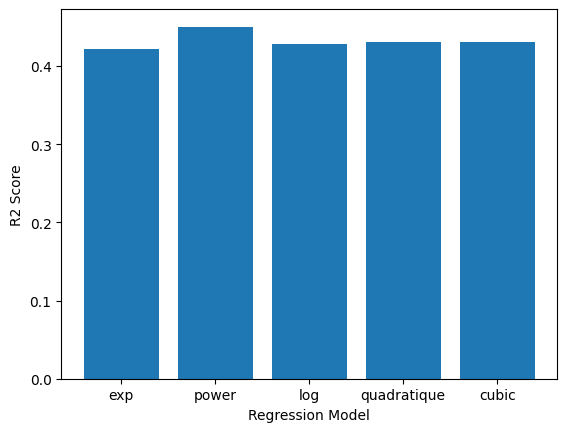

In [ ]:
r2_scores = {'exp':r21,'power':r22 ,'log':r23,'quadratique':r24,'cubic':r25}
plt.bar(range(len(r2_scores)), list(r2_scores.values()), align='center')
plt.xticks(range(len(r2_scores)), list(r2_scores.keys()))
plt.xlabel('Regression Model')
plt.ylabel('R2 Score')
plt.show()

